In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import fipy as fp

In [4]:
from matplotlibElPhFViewer import MatplotlibElPhFViewer
def viewElPhF(filename, L="3.2 nm", nx=1200):
    L = fp.Variable(L)
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx/L)

    xi = fp.CellVariable(mesh=mesh, name=r"$\xi$")
    phi = fp.CellVariable(mesh=mesh, name=r"$\phi$")  
    interstitials = [
        fp.CellVariable(mesh=mesh, name="$e^-$")
    ]

    substitutionals = [
        fp.CellVariable(mesh=mesh, name="$M^+$"),
        fp.CellVariable(mesh=mesh, name="$A^-$")
    ]

    N = fp.CellVariable(mesh=mesh, name="$N$")
    
    components = interstitials + substitutionals + [N]
    
    for j in components:
        j.Y = fp.CellVariable(mesh=mesh, name=j.name)

    interstitials[0].z   = -1
    substitutionals[0].z = +2
    substitutionals[1].z = -2
    N.z                  = 0

                         
    values = fp.numerix.loadtxt(filename, skiprows=1, unpack=True)
    
    xi.setValue(values[1])
    phi.setValue(values[2])
    
    _start = 3
    for j, mu in zip(interstitials + substitutionals,
                     values[_start:_start+len(interstitials + substitutionals)]):
        j.setValue(mu)

    _start = 3 + len(interstitials + substitutionals)
    for j, Y in zip(components,
                     values[_start:_start+len(components)]):
        j.Y.setValue(Y)

    charge = fp.CellVariable(mesh=mesh, value=N.z)
    for i in interstitials + substitutionals:
        charge += i.z * i.Y

    viewer = MatplotlibElPhFViewer(phase=xi,
                           potential=phi,
                           components=[i.Y for i in components],
                           charge=charge,
                           potentials=[i - i[...,0] for i in interstitials + substitutionals],
                           limits={
                               'phasemax':1.,
                               'phasemin':0.,
                           })


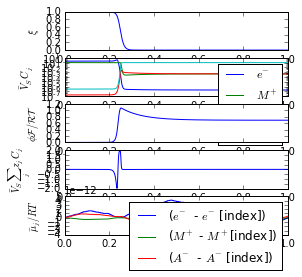

In [142]:
viewElPhF("0.0_V.tsv")

In [5]:
%%bash

smt configure --executable=python
smt configure --labelgenerator=uuid
smt configure --on-changed=store-diff
smt configure --addlabel=parameters


Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly


In [5]:
!pwd

/data/ame2/diffcap


In [5]:
import json
import os
import glob

In [6]:
#!smt export
with open(".smt/records_export.json") as ff:
    data = json.load(ff)
    
df = pd.DataFrame(data)

In [7]:
df.keys()

Index([       u'datastore',     u'dependencies',             u'diff',
               u'duration',       u'executable',       u'input_data',
        u'input_datastore',            u'label',      u'launch_mode',
              u'main_file',          u'outcome',      u'output_data',
             u'parameters',        u'platforms',           u'reason',
                u'repeats',       u'repository', u'script_arguments',
          u'stdout_stderr',             u'tags',        u'timestamp',
                   u'user',          u'version'],
      dtype='object')

In [8]:
df[["label","main_file","parameters","repeats"]]

,label,main_file,parameters,repeats
0,a6d67159a031,elphf0226.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
1,3bd0e11aac64,elphf0226.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
2,dacaffc405d5,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
3,9bea046fdbcf,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
4,dfd4f80144f5,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
5,a8a271557a67,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
6,923a08858fbe,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
7,7e8aa9ab33ca,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
8,af6c8f172c02,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None
9,8dfb76b803ed,elphf0238.py,"{u'content': u'{ ""concentration"": ""10.0 mo...",None


In [9]:
def get_concentration(d):
    return json.loads(d["content"])['concentration']

In [10]:
def parameters2json(d):
    return json.loads(d["content"])

In [11]:
df["concentration"] = df["parameters"].apply(get_concentration)

In [12]:
#pulls parameters and for all simulations
df2 = pd.DataFrame(list(df["parameters"].apply(parameters2json)))

In [13]:
df2

,concentration,galvani_potential,ncells,outer_sweeps,relaxation,sumatra_label
0,10.0 mol/l,-0.247474747475 V,1200,10,1,a6d67159a031
1,10.0 mol/l,-0.25 V,1200,10,1,3bd0e11aac64
2,10.0 mol/l,0.5 V,1200,10,1,dacaffc405d5
3,10.0 mol/l,0.495 V,1200,10,1,9bea046fdbcf
4,10.0 mol/l,0.49 V,1200,10,1,dfd4f80144f5
5,10.0 mol/l,0.485 V,1200,10,1,a8a271557a67
6,10.0 mol/l,0.48 V,1200,10,1,923a08858fbe
7,10.0 mol/l,0.475 V,1200,10,1,7e8aa9ab33ca
8,10.0 mol/l,0.47 V,1200,10,1,af6c8f172c02
9,10.0 mol/l,0.465 V,1200,10,1,8dfb76b803ed


In [14]:
df3 = pd.DataFrame(list(df["main_file"]))

In [15]:
df4=pd.concat([df2, df3], axis=1)

In [16]:
df4.columns = ['concentration','galvani_potential','ncells','outer_sweepes','relaxation','sumatra_label','main_file']

In [17]:
#separates 0.25 mol/l and 120 cells from files
df0226 = df4[(df4["main_file"]=="elphf0226.py")]

In [18]:
df0226

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
0,10.0 mol/l,-0.247474747475 V,1200,10,1,a6d67159a031,elphf0226.py
1,10.0 mol/l,-0.25 V,1200,10,1,3bd0e11aac64,elphf0226.py
2299,0.25 mol/l,0.5 V,12000,10,1,7917bd4e77a0,elphf0226.py
2300,0.25 mol/l,0.473684210526 V,12000,10,1,03e056ad37b9,elphf0226.py
2301,0.25 mol/l,0.447368421053 V,12000,10,1,c7c5440dcd61,elphf0226.py
2302,0.25 mol/l,0.421052631579 V,12000,10,1,d2776d668f21,elphf0226.py
2303,0.25 mol/l,0.394736842105 V,12000,10,1,0b6d2adfd09f,elphf0226.py
2304,0.25 mol/l,0.368421052632 V,12000,10,1,1dfaa30a517e,elphf0226.py
2305,0.25 mol/l,0.342105263158 V,12000,10,1,dbfc7438f67e,elphf0226.py
2306,0.25 mol/l,0.315789473684 V,12000,10,1,47d9c95d87bb,elphf0226.py


In [19]:
#separates files from elphf0238 simulations
df0237 = df4[(df4["main_file"]=="elphf0237.py")]
df0237

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
883,0.10 mol/l,0.5 V,1200,7,1,62617875f931,elphf0237.py
884,0.10 mol/l,0.494949494949 V,1200,7,1,d7b38b013c5f,elphf0237.py
885,0.10 mol/l,0.489898989899 V,1200,7,1,e04ff5860232,elphf0237.py
886,0.10 mol/l,0.484848484848 V,1200,7,1,4b83b96a6c33,elphf0237.py
887,0.10 mol/l,0.479797979798 V,1200,7,1,47b60a8358af,elphf0237.py
888,0.10 mol/l,0.474747474747 V,1200,7,1,a6aad4b8b017,elphf0237.py
889,0.10 mol/l,0.469696969697 V,1200,7,1,1acff738eaa0,elphf0237.py
890,0.10 mol/l,0.464646464646 V,1200,7,1,b527829cc8fe,elphf0237.py
891,0.10 mol/l,0.459595959596 V,1200,7,1,8e6333715437,elphf0237.py
892,0.10 mol/l,0.454545454545 V,1200,7,1,5982ba334ab7,elphf0237.py


In [20]:
df02371 = df4[(df4["main_file"]=="elphf0237.py")&(df4["concentration"]=="1.00 mol/l")]

In [21]:
#separates files from elphf0238 simulations
df0238 = df4[(df4["main_file"]=="elphf0238.py")]
df0238

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
2,10.0 mol/l,0.5 V,1200,10,1,dacaffc405d5,elphf0238.py
3,10.0 mol/l,0.495 V,1200,10,1,9bea046fdbcf,elphf0238.py
4,10.0 mol/l,0.49 V,1200,10,1,dfd4f80144f5,elphf0238.py
5,10.0 mol/l,0.485 V,1200,10,1,a8a271557a67,elphf0238.py
6,10.0 mol/l,0.48 V,1200,10,1,923a08858fbe,elphf0238.py
7,10.0 mol/l,0.475 V,1200,10,1,7e8aa9ab33ca,elphf0238.py
8,10.0 mol/l,0.47 V,1200,10,1,af6c8f172c02,elphf0238.py
9,10.0 mol/l,0.465 V,1200,10,1,8dfb76b803ed,elphf0238.py
10,10.0 mol/l,0.46 V,1200,10,1,65438f734413,elphf0238.py
11,10.0 mol/l,0.455 V,1200,10,1,668d4c1c1ab4,elphf0238.py


In [22]:
df02381 = df4[(df4["main_file"]=="elphf0238.py")&(df4["concentration"]=="0.25 mol/l")]

In [23]:
#separates files from elphf0238 simulations
df0239 = df4[(df4["main_file"]=="elphf0239.py")]
df0239

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
583,10.0 mol/l,0.5 V,1200,10,1,2c17bfe8ca76,elphf0239.py
584,10.0 mol/l,0.494949494949 V,1200,10,1,7fef4b6c6e10,elphf0239.py
585,10.0 mol/l,0.489898989899 V,1200,10,1,3bd57b11b04e,elphf0239.py
586,10.0 mol/l,0.484848484848 V,1200,10,1,39828aba5220,elphf0239.py
587,10.0 mol/l,0.479797979798 V,1200,10,1,f4cca759e248,elphf0239.py
588,10.0 mol/l,0.474747474747 V,1200,10,1,22823a7f980a,elphf0239.py
589,10.0 mol/l,0.469696969697 V,1200,10,1,912bc947a5da,elphf0239.py
590,10.0 mol/l,0.464646464646 V,1200,10,1,6ea3751b6d50,elphf0239.py
591,10.0 mol/l,0.459595959596 V,1200,10,1,22a82d183836,elphf0239.py
592,10.0 mol/l,0.454545454545 V,1200,10,1,765033571d19,elphf0239.py


In [24]:
df02391 = df4[(df4["main_file"]=="elphf0239.py")&(df4["concentration"]=="1.00 mol/l")]

In [25]:
#separates files from elphf0238 simulations
df0240 = df4[(df4["main_file"]=="elphf0240.py")]
df0240

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file
354,1.00 mol/l,0.5 V,1200,10,1,f156e2d42ce2,elphf0240.py
355,1.00 mol/l,0.494949494949 V,1200,10,1,ed0812fbadff,elphf0240.py
356,1.00 mol/l,0.489898989899 V,1200,10,1,13bf915f194c,elphf0240.py
357,1.00 mol/l,0.484848484848 V,1200,10,1,b6b970e770da,elphf0240.py
358,1.00 mol/l,0.479797979798 V,1200,10,1,7e526fcfde2f,elphf0240.py
359,1.00 mol/l,0.474747474747 V,1200,10,1,e13d7a606203,elphf0240.py
360,1.00 mol/l,0.469696969697 V,1200,10,1,837a8b151963,elphf0240.py
361,1.00 mol/l,0.464646464646 V,1200,10,1,c831f5628f17,elphf0240.py
362,1.00 mol/l,0.459595959596 V,1200,10,1,1228fd0e40e8,elphf0240.py
363,1.00 mol/l,0.454545454545 V,1200,10,1,d3fd98017575,elphf0240.py


In [29]:
def load_result(label):
    try:
        result = fp.numerix.loadtxt(os.path.join("Data", label, "test.txt"))
    except IOError:
        result = [fp.numerix.NaN] * 3
    return dict(scaled_galvani_potential=result[0], surface_energy=result[1], surface_charge=result[2])

In [30]:
df5 = pd.DataFrame(list(df0226["sumatra_label"].apply(load_result)),index=df0226.index)

In [31]:
df0237r = pd.DataFrame(list(df0237["sumatra_label"].apply(load_result)),index=df0237.index)

In [32]:
df02371r = pd.DataFrame(list(df02371["sumatra_label"].apply(load_result)),index=df02371.index)

In [33]:
df0238r = pd.DataFrame(list(df0238["sumatra_label"].apply(load_result)),index=df0238.index)

In [34]:
df02381r = pd.DataFrame(list(df02381["sumatra_label"].apply(load_result)),index=df02381.index)

In [35]:
df0239r = pd.DataFrame(list(df0239["sumatra_label"].apply(load_result)),index=df0239.index)

In [36]:
df02391r = pd.DataFrame(list(df02391["sumatra_label"].apply(load_result)),index=df02391.index)

In [37]:
df0240r = pd.DataFrame(list(df0240["sumatra_label"].apply(load_result)),index=df0240.index)

In [38]:
errorcheck = df02381r[(df02381["galvani_potential"] == "0.0 V")]
errorcheck

,scaled_galvani_potential,surface_charge,surface_energy
582,NaN,NaN,NaN
1542,0,-0.003576,0.476367
1593,0,-0.003576,0.476367
2120,0,-0.003576,0.476367


In [39]:
df02381.loc[961:1060]

,concentration,galvani_potential,ncells,outer_sweepes,relaxation,sumatra_label,main_file


In [40]:
df5

,scaled_galvani_potential,surface_charge,surface_energy
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2299,19.470646,0.092097,-0.395987
2300,18.445875,0.088585,-0.303398
2301,17.421104,0.084944,-0.214472
2302,16.396333,0.074656,-0.435831
2303,15.371562,0.010830,-0.238702
2304,14.346791,0.011875,-0.230884
2305,13.322021,0.068704,0.101483
2306,12.297250,0.064091,0.169548


In [41]:
#interpolates data from 1200 cell files
from scipy.interpolate import interp1d
v1200interp = interp1d(v1200["scaled_galvani_potential"],v1200["surface_energy"])

NameError: name 'v1200' is not defined

In [ ]:
#plots difference in surface energy for different number of cells compared to 1200 cells. 
for ncells in [120,300,600,800,12000]:
    vn = df5[(df0226["concentration"] == "0.25 mol/l")&(df0226["ncells"]==ncells)]
    plt.semilogy(vn["scaled_galvani_potential"],abs(v1200interp(vn["scaled_galvani_potential"])-vn["surface_energy"]),label="{}".format(ncells))
plt.legend(loc="upper left")

In [33]:
from scipy.interpolate import interp1d
v1200interp = interp1d(v1200["scaled_galvani_potential"],v1200["surface_charge"])

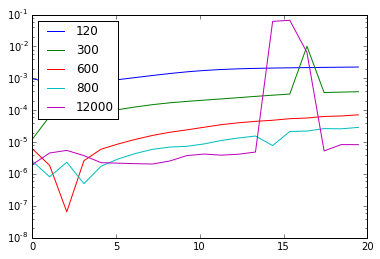

In [34]:
#plots difference in surface charge for different number of cells compared to 1200
for ncells in [120,300,600,800,12000]:
    vn = df5[(df0226["concentration"] == "0.25 mol/l")&(df0226["ncells"]==ncells)]
    plt.semilogy(vn["scaled_galvani_potential"#plots diffcap for various concentrations
plt.ylim(ymin=-0.01,ymax=0.01)],abs(v1200interp(vn["scaled_galvani_potential"])-vn["surface_charge"]),label="{}".format(ncells))
plt.legend(loc="upper left")

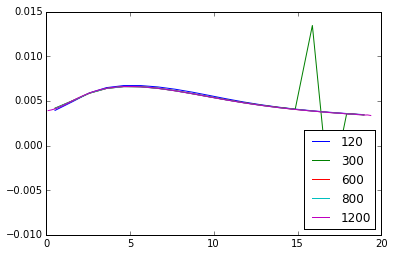

In [42]:
for ncells in [120,300,600,800,1200]:
    vn = df5[(df0226["concentration"] == "0.25 mol/l")&(df0226["ncells"]==ncells)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(ncells))
plt.legend(loc="lower right")

# Divalent

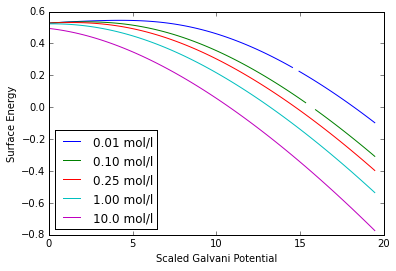

In [43]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_energy"],label="{}".format(c))
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Energy')
plt.legend(loc="lower left")

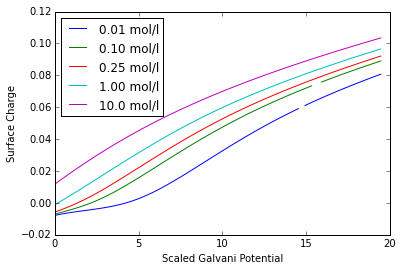

In [44]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Charge')

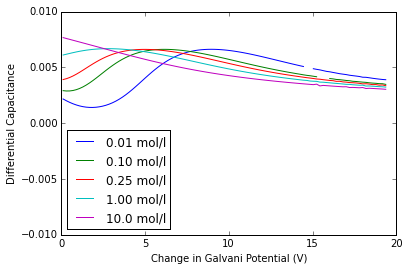

In [45]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Change in Galvani Potential (V)')
plt.ylabel('Differential Capacitance')

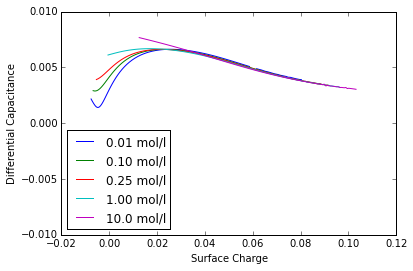

In [79]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

# 0237 divalent more defects

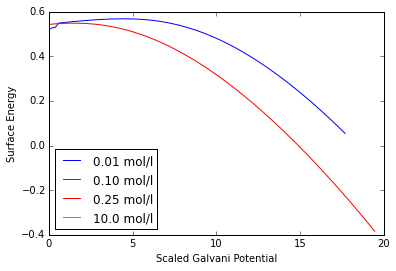

In [47]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_energy"],label="{}".format(c))
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Energy')
plt.legend(loc="lower left")
c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
plt.plot(c1["scaled_galvani_potential"],c1["surface_energy"],label="{}".format(c))

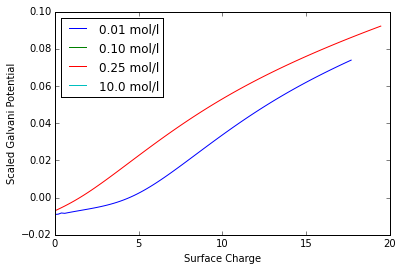

In [48]:
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.ylabel('Scaled Galvani Potential')
plt.xlabel('Surface Charge')
c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
plt.plot(c1["scaled_galvani_potential"],c1["surface_charge"],label="{}".format(c))

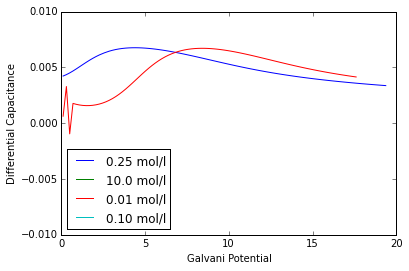

In [49]:
#plots diffcap for various concentrations
for c in ["0.25 mol/l","10.0 mol/l","0.01 mol/l","0.10 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)

c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
gp1 = np.array(c1["scaled_galvani_potential"])
plt.plot((gp1[:-1]+gp1[1:])/2,diffcap1,label="{}".format(c))
plt.xlabel('Galvani Potential')
plt.ylabel('Differential Capacitance')

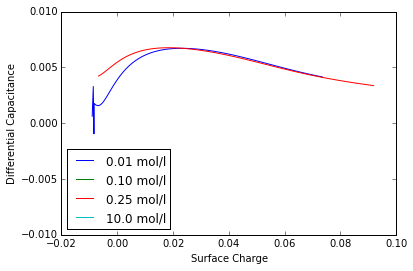

In [50]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
sc1 = np.array(c1["surface_charge"])
plt.plot((sc1[:-1]+sc1[1:])/2,diffcap1,label="{}".format(c))

# Parsons-Zobel plots

In [51]:
#attempt at Parsons-Zobel df for 0237
sc = df0237r[(df0237r["surface_charge"]<0.03)]
#len(np.diff(1/sc["surface_charge"]))
pz = 1/(np.diff(sc["surface_charge"])/np.diff(sc["scaled_galvani_potential"]))

In [148]:
L = fp.Variable("3.2 nm")
Vs = fp.Variable("0.018 l/mol")
R = fp.Variable("1 Nav * kB")
T = fp.Variable("298 K")
z = 2

Faraday = fp.Variable("1 Nav*e")
dielectric = fp.Variable("78.49 eps0")
pi = fp.numerix.pi

0.01 [4.0764649027596107, nan, 4.3842298422020649] [3.3404119979698566, 3.3460057583868568, 3.3553079689927712]
0.0125 [4.2379196708405358, nan, 4.4557200592803747] [4.1752350658791304, 4.1797117214377044, 4.1871621781287782]
0.015 [4.3505013806740278, nan, 4.4975610741351559] [5.0100995956938297, 5.0138308884273828, 5.020043546561813]
0.0175 [4.4242094811027224, nan, 4.5153008801041334] [5.8449878208988029, 5.8481864578202671, 5.8535136351648447]
0.02 [4.465984791997335, nan, 4.513218679062506] [6.6798908567729001, 6.6826898833759465, 6.6873523242762998]


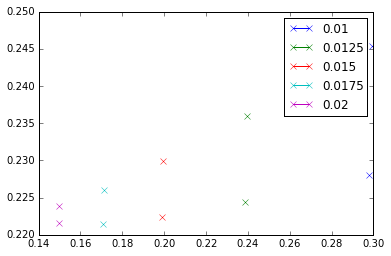

In [57]:
from scipy.interpolate import interp1d
interpolators=dict()

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)
Lb = (Faraday**2/(dielectric*R*T)).inBaseUnits()
for charge in [0.01,0.0125,0.015,0.0175,0.02]:
    C = []
    Cgc = []
    ChargeDim = charge*L*Faraday/Vs
    CapacitanceScale = (L*Faraday**2/(Vs*R*T)/fp.Variable("1 F/m**2")).inBaseUnits()
    for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l"]:
        Ld = fp.numerix.sqrt(1/(8*fp.numerix.pi*Lb*c)).inBaseUnits()
        sigmastar = (Faraday/(2*pi*Lb*Ld)).inBaseUnits()
        C.append(interpolators[c](charge)*CapacitanceScale)
        Cgc.append((dielectric*Lb/(2*Faraday)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)/fp.Variable("1 F/m**2")).inBaseUnits())
    print charge,C,Cgc
#    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
plt.legend()

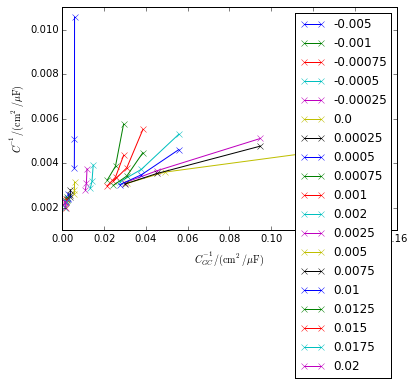

In [88]:
from scipy.interpolate import interp1d
interpolators=dict()

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)
Lb = (Faraday**2/(dielectric*R*T)).inBaseUnits()
for charge in [-0.005, -0.001, -0.00075, -0.0005, -0.00025, 0.00, 0.00025, 0.0005, 0.00075, 0.001, 0.002, 0.0025, 0.005, 0.0075, 0.01,0.0125,0.015,0.0175,0.02]:
    C = []
    Cgc = []
    ChargeDim = charge*L*Faraday/Vs
    CapacitanceScale = (L*Faraday**2/(Vs*R*T)/fp.Variable("1 muF/cm**2")).inBaseUnits()
    for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
        Ld = fp.numerix.sqrt(1/(8*pi*Lb*c)).inBaseUnits()
        sigmastar = (Faraday/(2*pi*Lb*Ld)).inBaseUnits()
        C.append(interpolators[c](charge)*CapacitanceScale)
        Cgc.append((dielectric*Lb/(2*Faraday)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)/fp.Variable("1 muF/cm**2")).inBaseUnits())
#    print charge,C,Cgc
    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
plt.legend()
plt.ylabel("$C^{-1} / (\mathrm{cm^2/\mu F})$")
plt.xlabel("$C_{GC}^{-1} / (\mathrm{cm^2/\mu F})$")

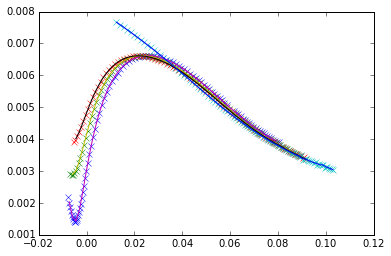

In [84]:
from scipy.interpolate import interp1d
interpolators=dict()

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    plt.plot(sc, diffcap, marker="x", linestyle="")
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    charge = fp.numerix.linspace(-0.02, 0.12, 100)
    plt.plot(charge, interpolators[c](charge))

(-0.2, 0.2)

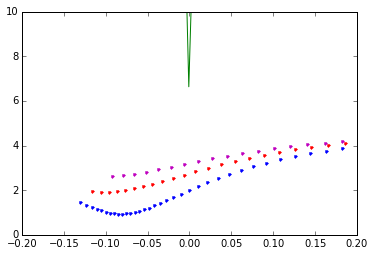

In [118]:
from scipy.interpolate import interp1d
interpolators=dict()

Lb = (Faraday**2/(dielectric*R*T)).inBaseUnits()
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    sc = sc*L*Faraday/Vs
    plt.plot(sc, diffcap*(L*Faraday**2/(Vs*R*T)/fp.Variable("1 F/m**2")).inBaseUnits(), marker=".", linestyle="")

    Ld = fp.numerix.sqrt(1/(8*pi*Lb*c)).inBaseUnits()
    sigmastar = (Faraday/(2*pi*Lb*Ld)).inBaseUnits()
    Cgc = (dielectric*Lb/(2*Faraday)*fp.numerix.sqrt(sc**2+sigmastar**2)/fp.Variable("1 muF/cm**2")).inBaseUnits()
    
    plt.plot(sc, Cgc)
    
plt.ylim(0, 10)
plt.xlim(-.2, .2)


Re-derived Gouy-Chapman capacitance as function of surface charge from PRE 69 (2004) 021603

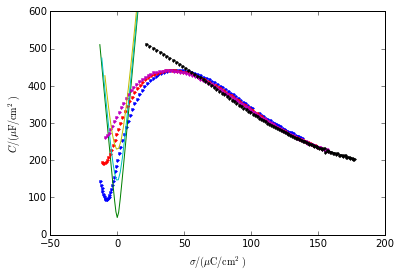

In [152]:
from scipy.interpolate import interp1d
interpolators=dict()

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    sc = (sc*L*Faraday/Vs).inUnitsOf("muC/cm**2")
    plt.plot((sc / fp.Variable("1 muC/cm**2")).inBaseUnits(), diffcap*(L*Faraday**2/(Vs*R*T)/fp.Variable("1 muF/cm**2")).inBaseUnits(), marker=".", linestyle="")

    sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
    Cgc = (z*Faraday/(2*R*T)*fp.numerix.sqrt(sc**2+sigmastar**2)/fp.Variable("1 muF/cm**2")).inBaseUnits()
    
#    plt.semilogy(sc, Cgc)
    plt.plot((sc / fp.Variable("1 muC/cm**2")).inBaseUnits(), Cgc)
    
plt.ylim(0, 600)

plt.ylabel("$C / (\mathrm{\mu F / cm^2})$")
plt.xlabel("$\sigma / (\mathrm{\mu C / cm^2})$")

Good agreement on magnitude, but minima of phase field capacitance does not sit at pzc. Looking closely at our original paper, it doesn't there, either. Some "intrinsic" interfacial charge in the phase field model? Maybe experiment with phase field interfacial thickness.

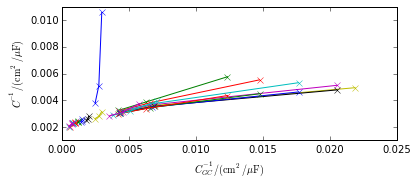

In [238]:
from scipy.interpolate import interp1d
interpolators=dict()

plt.axes(aspect=1)
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)
for charge in [-0.005, -0.001, -0.00075, -0.0005, -0.00025, 0.00, 0.00025, 0.0005, 0.00075, 0.001, 0.002, 0.0025, 0.005, 0.0075, 0.01,0.0125,0.015,0.0175,0.02]:
    C = []
    Cgc = []
    ChargeDim = charge*L*Faraday/Vs
    CapacitanceScale = (L*Faraday**2/(Vs*R*T)/fp.Variable("1 muF/cm**2")).inBaseUnits()
    for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
        C.append(interpolators[c](charge)*CapacitanceScale)
        sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
        Cgc.append((z*Faraday/(2*R*T)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)/fp.Variable("1 muF/cm**2")).inBaseUnits())
#    print charge,C,Cgc
    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
#plt.legend()
plt.ylabel("$C^{-1} / (\mathrm{cm^2/\mu F})$")
plt.xlabel("$C_{GC}^{-1} / (\mathrm{cm^2/\mu F})$")
#plt.ylim(0, 0.003)
plt.savefig("no_offset.png")

what if we introduce an arbitrary charge offset to center the capacitance minima on pzc?

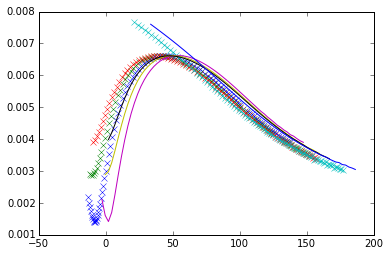

In [159]:
from scipy.interpolate import interp1d
interpolators=dict()

chargeoffset = "-10 muC/cm**2"

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    plt.plot((sc*L*Faraday/Vs/"1 muC/cm**2").inBaseUnits(), diffcap, marker="x", linestyle="")
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)

for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    charge = fp.numerix.linspace(-0.02, 0.12, 100)
    plt.plot((charge*L*Faraday/Vs/"1 muC/cm**2").inBaseUnits(), interpolators[c](charge + (chargeoffset/(L*Faraday/Vs)).inBaseUnits()))

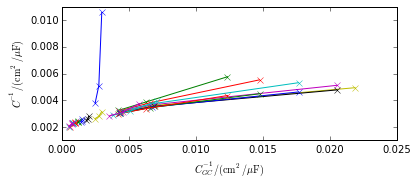

In [239]:
from scipy.interpolate import interp1d
interpolators=dict()

# chargeoffset = "-10 muC/cm**2"
chargeoffset = "0 muC/cm**2"
ax = plt.axes(aspect=1)
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)
for charge in [-0.005, -0.001, -0.00075, -0.0005, -0.00025, 0.00, 0.00025, 0.0005, 0.00075, 0.001, 0.002, 0.0025, 0.005, 0.0075, 0.01,0.0125,0.015,0.0175,0.02]:
#for charge in [-0.001, -0.00075, -0.0005, -0.00025, 0.00, 0.00025, 0.0005, 0.00075, 0.001]:
    C = []
    Cgc = []
    ChargeDim = charge*L*Faraday/Vs
    CapacitanceScale = (L*Faraday**2/(Vs*R*T)/fp.Variable("1 muF/cm**2")).inBaseUnits()
    for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
#    for c in ["0.25 mol/l","10.0 mol/l"]:
        C.append(interpolators[c](charge + (chargeoffset/(L*Faraday/Vs)).inBaseUnits())*CapacitanceScale)
        sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
        Cgc.append((z*Faraday/(2*R*T)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)/fp.Variable("1 muF/cm**2")).inBaseUnits())
#    print charge,C,Cgc
    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
#plt.legend(loc="upper left")
plt.ylabel("$C^{-1} / (\mathrm{cm^2/\mu F})$")
plt.xlabel("$C_{GC}^{-1} / (\mathrm{cm^2/\mu F})$")
#plt.ylim(0, 0.003)
plt.savefig("offset.png")

Charge offset doesn't seem to change PZ plot at all

(0.0, 0.005)

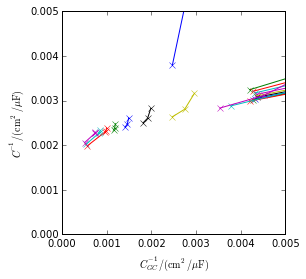

In [233]:
from scipy.interpolate import interp1d
interpolators=dict()

# chargeoffset = "-10 muC/cm**2"
chargeoffset = "0 muC/cm**2"
ax = plt.axes(aspect=1)
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l", "10.0 mol/l"]:
    vn = df5[(df0226["concentration"]==c)&(df0226["ncells"]==1200)]
    vn = vn.sort("scaled_galvani_potential")
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    sc = (sc[:-1]+sc[1:])/2
    interpolators[c]=interp1d(sc,diffcap,bounds_error=False)
for charge in [-0.005, -0.001, -0.00075, -0.0005, -0.00025, 0.00, 0.00025, 0.0005, 0.00075, 0.001, 0.002, 0.0025, 0.005, 0.0075, 0.01,0.0125,0.015,0.0175,0.02]:
#for charge in [-0.001, -0.00075, -0.0005, -0.00025, 0.00, 0.00025, 0.0005, 0.00075, 0.001]:
    C = []
    Cgc = []
    ChargeDim = charge*L*Faraday/Vs
    CapacitanceScale = (L*Faraday**2/(Vs*R*T)/fp.Variable("1 muF/cm**2")).inBaseUnits()
    for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
#    for c in ["0.25 mol/l","10.0 mol/l"]:
        C.append(interpolators[c](charge + (chargeoffset/(L*Faraday/Vs)).inBaseUnits())*CapacitanceScale)
        sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
        Cgc.append((z*Faraday/(2*R*T)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)/fp.Variable("1 muF/cm**2")).inBaseUnits())
#    print charge,C,Cgc
    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
#plt.legend(loc="upper left")
plt.ylabel("$C^{-1} / (\mathrm{cm^2/\mu F})$")
plt.xlabel("$C_{GC}^{-1} / (\mathrm{cm^2/\mu F})$")
plt.xlim(0.0, 0.005)
plt.ylim(0.0, 0.005)
#plt.ylim(0, 0.003)

eyeballing the Helmholtz capacitance $C_H$

In [216]:
print (1. / fp.Variable("0.002 cm**2/muF"))

500.0 muF/cm**2


thickness of the Helmoltz layer

In [218]:
print (dielectric*fp.Variable("0.002 cm**2/muF")).inUnitsOf("nm")

0.138993040361 nm


which is of the order of the phase field thickness quoted in PRE 69 (2004) 021603, of 0.1 nm. Compare the Debye length:

In [225]:
print fp.numerix.sqrt(dielectric*R*T/(2*z**2*Faraday**2*"0.01 mol/l")).inUnitsOf("nm")

1.52054998751 nm


Should try some runs with a very thin phase field to see effect on $C_H$

## idealized plots

Calculate capacitance curves and Parsons-Zobel plots for Gouy-Chapman-Stern

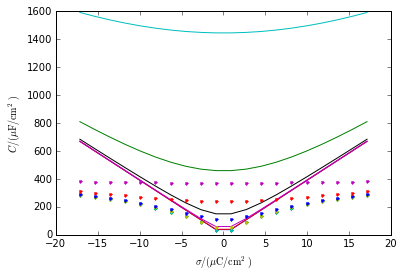

In [203]:
Ch = fp.Variable("500 muF/cm**2")
charge = fp.numerix.linspace(-0.01, 0.01, 20)
ChargeDim = charge*L*Faraday/Vs
for c in ["0.0001 mol/l", "0.001 mol/l", "0.01 mol/l","0.10 mol/l","1. mol/l","10.0 mol/l"]:
    sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
    Cgc = z*Faraday/(2*R*T)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)
    C = (Cgc**-1 + Ch**-1)**-1
    plt.plot((ChargeDim / "1 muC/cm**2").inBaseUnits(), (Cgc / "1 muF/cm**2").inBaseUnits())
    plt.plot((ChargeDim / "1 muC/cm**2").inBaseUnits(), (C / "1 muF/cm**2").inBaseUnits(), marker=".", linestyle="")
    # plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
plt.legend(loc="upper left")
plt.ylabel("$C / (\mathrm{\mu F/cm^2})$")
plt.xlabel("$\sigma / (\mathrm{\mu C/cm^2})$")


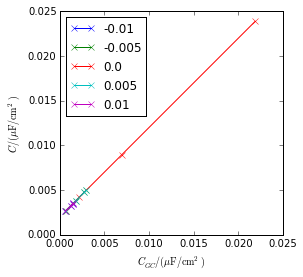

In [234]:
Ch = fp.Variable("500 muF/cm**2")
plt.axes(aspect=1)
for charge in fp.numerix.linspace(-0.01, 0.01, 5):
    ChargeDim = charge*L*Faraday/Vs
    C = []
    Cgc = []
#    for c in ["0.0001 mol/l", "0.001 mol/l", "0.01 mol/l","0.10 mol/l","1. mol/l","10.0 mol/l"]:
    for c in ["0.01 mol/l","0.10 mol/l","1. mol/l","10.0 mol/l"]:
        sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
        Cgcval = z*Faraday/(2*R*T)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)
        Cgc.append((Cgcval / "1 muF/cm**2").inBaseUnits())
        C.append(((Cgcval**-1 + Ch**-1)**-1 / "1 muF/cm**2").inBaseUnits())
    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
plt.legend(loc="upper left")
plt.ylabel("$C / (\mathrm{\mu F/cm^2})$")
plt.xlabel("$C_{GC} / (\mathrm{\mu F/cm^2})$")


Introduce charge dependence to $C_H$

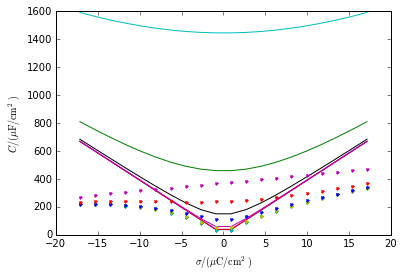

In [214]:
Ch0 = fp.Variable("500 muF/cm**2")
slope = fp.Variable("100 muF/cm**2") / fp.Variable("10 muC/cm**2")
charge = fp.numerix.linspace(-0.01, 0.01, 20)
ChargeDim = charge*L*Faraday/Vs
Ch = Ch0 + slope * ChargeDim
for c in ["0.0001 mol/l", "0.001 mol/l", "0.01 mol/l","0.10 mol/l","1. mol/l","10.0 mol/l"]:
    sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
    Cgc = z*Faraday/(2*R*T)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)
    C = (Cgc**-1 + Ch**-1)**-1
    plt.plot((ChargeDim / "1 muC/cm**2").inBaseUnits(), (Cgc / "1 muF/cm**2").inBaseUnits())
    plt.plot((ChargeDim / "1 muC/cm**2").inBaseUnits(), (C / "1 muF/cm**2").inBaseUnits(), marker=".", linestyle="")
    # plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
plt.legend(loc="upper left")
plt.ylabel("$C / (\mathrm{\mu F/cm^2})$")
plt.xlabel("$\sigma / (\mathrm{\mu C/cm^2})$")


(0, 0.005)

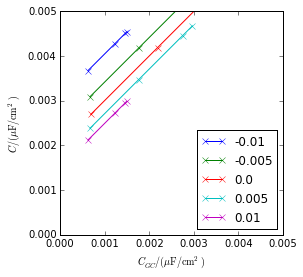

In [235]:
Ch0 = fp.Variable("500 muF/cm**2")
slope = fp.Variable("100 muF/cm**2") / fp.Variable("10 muC/cm**2")
plt.axes(aspect=1)
for charge in fp.numerix.linspace(-0.01, 0.01, 5):
    ChargeDim = charge*L*Faraday/Vs
    Ch = Ch0 + slope * ChargeDim
    C = []
    Cgc = []
#    for c in ["0.0001 mol/l", "0.001 mol/l", "0.01 mol/l","0.10 mol/l","1. mol/l","10.0 mol/l"]:
    for c in ["0.01 mol/l","0.10 mol/l","1. mol/l","10.0 mol/l"]:
        sigmastar = (fp.numerix.sqrt(8*dielectric*R*T*c)).inBaseUnits()
        Cgcval = z*Faraday/(2*R*T)*fp.numerix.sqrt(ChargeDim**2+sigmastar**2)
        Cgc.append((Cgcval / "1 muF/cm**2").inBaseUnits())
        C.append(((Cgcval**-1 + Ch**-1)**-1 / "1 muF/cm**2").inBaseUnits())
    plt.plot(fp.numerix.array(Cgc)**-1,fp.numerix.array(C)**-1,label="{}".format(charge),marker="x")
plt.legend(loc="lower right")
plt.ylabel("$C / (\mathrm{\mu F/cm^2})$")
plt.xlabel("$C_{GC} / (\mathrm{\mu F/cm^2})$")
plt.xlim(0, 0.005)
plt.ylim(0, 0.005)


# 0239 monovalent 

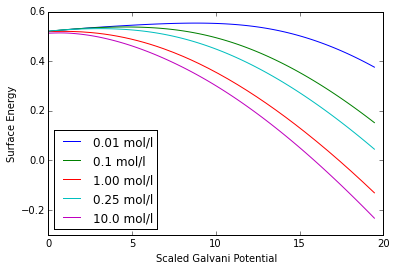

In [81]:
for c in ["0.01 mol/l","0.1 mol/l","1.00 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)&(df0239["ncells"]==1200)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_energy"],label="{}".format(c))
plt.xlabel('Scaled Galvani Potential')
plt.ylabel('Surface Energy')
plt.legend(loc="lower left")

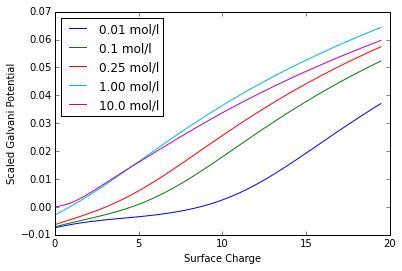

In [78]:
for c in ["0.01 mol/l","0.1 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.ylabel('Scaled Galvani Potential')
plt.xlabel('Surface Charge')

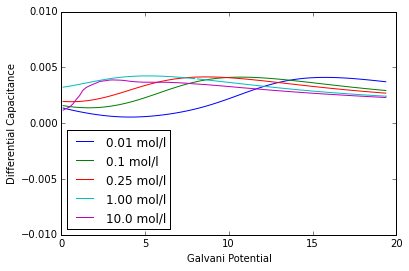

In [55]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.1 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Galvani Potential')
plt.ylabel('Differential Capacitance')

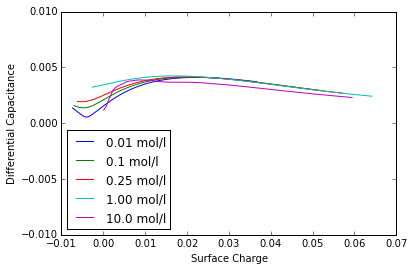

In [84]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.1 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0239r[(df0239["concentration"]==c)&(df0239["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

# 0238 divalent, many defects

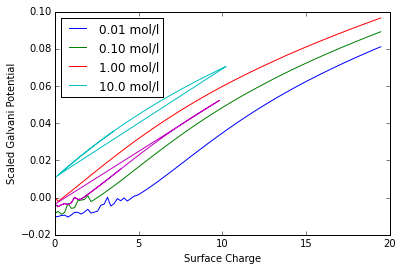

In [52]:
for c in ["0.01 mol/l","0.10 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df0238r[(df0238["concentration"]==c)]
    plt.plot(vn["scaled_galvani_potential"],vn["surface_charge"],label="{}".format(c))
plt.legend(loc="upper left")
plt.ylabel('Scaled Galvani Potential')
plt.xlabel('Surface Charge')

c1 = df02381r.loc[1438:1537][(df02381.loc[1438:1537]["concentration"]=="0.25 mol/l")]
plt.plot(c1["scaled_galvani_potential"],c1["surface_charge"],label="{}".format(c))

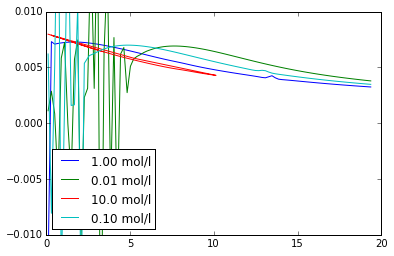

In [54]:
#plots diffcap for various concentrations
for c in ["1.00 mol/l","0.01 mol/l","10.0 mol/l","0.10 mol/l"]:
    vn = df0238r[(df0238["concentration"]==c)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    gp = np.array(vn["scaled_galvani_potential"])
    plt.plot((gp[:-1]+gp[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)

c1 = df02381r.loc[960:1061][(df02381.loc[960:1061]["concentration"]=="0.25 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
gp1 = np.array(c1["scaled_galvani_potential"])
plt.plot((gp1[:-1]+gp1[1:])/2,diffcap1,label="{}".format(c))

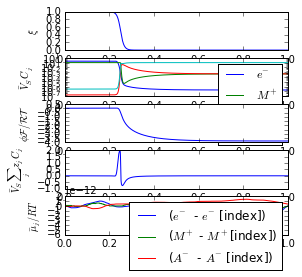

In [163]:
viewElPhF(os.path.join("Data", "17c4be819472", "output.tsv"))

In [253]:
time = df2[(df2["concentration"] == "0.25 mol/l")&(df2["galvani_potential"]=="0.5 V")]

In [254]:
time

,concentration,galvani_potential,ncells,outer_sweeps,relaxation,sumatra_label
duration,,,,,,
285.804225,0.25 mol/l,0.5 V,12000,10,1,7917bd4e77a0
85.474873,0.25 mol/l,0.5 V,120,10,1,797e80f85b5f
101.603450,0.25 mol/l,0.5 V,300,10,1,ee37a02bdead
83.267868,0.25 mol/l,0.5 V,600,10,1,2f642a03acc6
175.452215,0.25 mol/l,0.5 V,800,10,1,8da60444a189
85.520260,0.25 mol/l,0.5 V,1200,10,1,c7278979f934


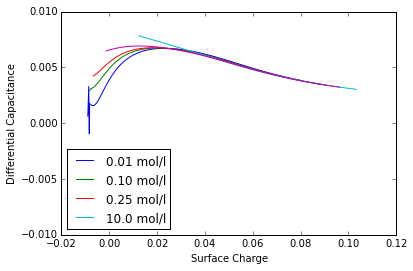

In [71]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","10.0 mol/l"]:
    vn = df0237r[(df0237["concentration"]==c)&(df0237["ncells"]==1200)]
    diffcap = np.diff(vn["surface_charge"])/np.diff(vn["scaled_galvani_potential"])
    sc = np.array(vn["surface_charge"])
    plt.plot((sc[:-1]+sc[1:])/2,diffcap,label="{}".format(c))
plt.legend(loc="lower left")
plt.ylim(ymin=-0.01,ymax=0.01)
plt.xlabel('Surface Charge')
plt.ylabel('Differential Capacitance')

c1 = df02371r.loc[1011:1110][(df02371.loc[1011:1110]["concentration"]=="1.00 mol/l")]
diffcap1 = np.diff(c1["surface_charge"])/np.diff(c1["scaled_galvani_potential"])
sc1 = np.array(c1["surface_charge"])
plt.plot((sc1[:-1]+sc1[1:])/2,diffcap1,label="{}".format(c))